In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_ulbi = pd.read_csv('Universitas Logistik dan Bisnis Internasional (ULBI).csv')
df_itts = pd.read_csv('Institut Teknologi Telkom Surabaya.csv')
df_itp = pd.read_csv('Institut Teknologi PLN.csv')
df_uper = pd.read_csv('Universitas Pertamina.csv')
df_uisi = pd.read_csv('Universitas Internasional Semen Indonesia.csv')
df_telu = pd.read_csv('Universitas Telkom Bandung.csv')
df_ittp = pd.read_csv('Telkom Purwokerto University.csv')

In [2]:
df_total_all = pd.concat([df_ulbi,df_uper,df_itp,df_itts,df_uisi,df_telu,df_ittp], ignore_index=True)
print(df_total_all)

                       nama  \
0            PEMBERI ULASAN   
1     Naufal Adilla Bestari   
2         Aqila Ashfa Afiza   
3        Nadiya Nur Altavia   
4             Agus Sulaeman   
...                     ...   
4059        Arif Sumaryanto   
4060        Agung Wicaksono   
4061          Agung Prabowo   
4062         Adinda Hashina   
4063             Ridho Juan   

                                                 review  bintang  
0     kampus aneh pada masanya sebelum covid , waktu...        1  
1     Tidak memanusiakan mahasiswa saat ospek contoh...        1  
2     Harusnya bisa memporsikan berbagai acara..Disi...        1  
3     Aku joined this campus for 3 tahun tapi serahu...        1  
4     Saya Ortu dari salah satu siswa ULBY yg mendap...        1  
...                                                 ...      ...  
4059                           Toward Telkom University        5  
4060                                         Luar biasa        5  
4061                    

In [3]:
df_total_all_new = df_total_all.dropna(ignore_index=True)
df_total_all_new.isna().sum()

nama       0
review     0
bintang    0
dtype: int64

In [46]:
for review in df_total_all_new['review']:
    print(review)


kampus aneh pada masanya sebelum covid  waktu masih politeknik pos indonesia orang tinggal skripsi udh dapat magang malah disuruh ketua prodinya dikasih ke sodara dia nyuruh saya cari magang lain najis bener ketua prodi kampus ini pada masa itu tau sekarang sampe ganti nama jadi ulbi makin bener apa makin bobrok moga aja dosen tersangkanya baca dan inget punya dosa apa ke saya dan orang tua sayaorang tua saya datang dari luar kota ke bandung malah di usir  disuruh pulang lagi padahal usia orang tua saya lebih tua dari dosen itu sopan kagak woisaya tidak nunggak bayaran apapun uang gedung lunas semester lunas tapi dipersulit najis tralala emang inget anda islam percaya ada hari dimana timbang amal baik dan buruk sudah lewat bertahun2 saya masih mendapatkan kejadian itu dan nama dosennyamembuat anda sekalian menjadi orang tua  lebih baik kuliahin anak anda di polman di dago polban dll rata2 yang kuliah disana ga dipersulit kuliahnyani kisah nyata saya pribadikampus aneh pada masanya sebe

In [5]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
import pandas as pd

translator = GoogleTranslator(source='en', target='id')

def terjemahkan(teks):
    try:
        return translator.translate(teks)
    except Exception as e:
        return str(e)

tqdm.pandas()
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)

df = df_total_all_new[~df_total_all_new['review'].str.contains("exception", case=False, na=False)]
df = df_total_all_new[~df_total_all_new['review'].str.contains("attribute", case=False, na=False)]

# Tampilkan DataFrame setelah terjemahan
print(df_total_all_new)


100%|██████████| 2495/2495 [10:50<00:00,  3.84it/s]

                       nama  \
0            PEMBERI ULASAN   
1     Naufal Adilla Bestari   
2         Aqila Ashfa Afiza   
3        Nadiya Nur Altavia   
4             Agus Sulaeman   
...                     ...   
2490        Arif Sumaryanto   
2491        Agung Wicaksono   
2492          Agung Prabowo   
2493         Adinda Hashina   
2494             Ridho Juan   

                                                 review  bintang  
0     kampus aneh pada masanya sebelum covid , waktu...        1  
1     Tidak memanusiakan siswa saat ospek contohnya,...        1  
2     Harusnya bisa memporsikan berbagai acara..Disi...        1  
3     Saya bergabung di kampus ini selama 3 tahun ta...        1  
4     Saya Ortu dari salah satu siswa ULBY yg mendap...        1  
...                                                 ...      ...  
2490                          Menuju Universitas Telkom        5  
2491                                         Luar biasa        5  
2492                    


C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_8312\1466462576.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)


In [6]:
# Langkah 1: Bersihkan semua string dan ubah ke huruf kecil
df_total_all_new = df_total_all_new.progress_applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Langkah 2: Buat fungsi untuk menghapus tanda baca
def hapus_tanda_baca(teks):
    if not isinstance(teks, str):
        # Return teks as-is if it's not a string
        return teks
    tanda_baca = ".,!?():"
    for char in tanda_baca:
        teks = teks.replace(char, "")
    return teks

# Langkah 3: Aplikasikan fungsi pada kolom yang diinginkan
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(hapus_tanda_baca)

# Langkah 4: Buat fungsi untuk menghitung jumlah kata
def hitung_jumlah_kata(teks):
    if isinstance(teks, str):
        return len(teks.split())
    return 0  # Return 0 for non-string values

# Terapkan jika diperlukan
df_total_all_new['word_count'] = df_total_all_new['review'].progress_apply(hitung_jumlah_kata)

# Tampilkan DataFrame setelah penghapusan tanda baca dan hitung jumlah kata
print(df_total_all_new.head())


  0%|          | 0/7485 [00:00<?, ?it/s]C:\Users\HAFIZ\anaconda3\Lib\site-packages\tqdm\std.py:805: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return getattr(df, df_function)(wrapper, **kwargs)
100%|██████████| 2495/2495 [00:00<00:00, 449943.61it/s]

                    nama                                             review  \
0         pemberi ulasan  kampus aneh pada masanya sebelum covid  waktu ...   
1  naufal adilla bestari  tidak memanusiakan siswa saat ospek contohnya ...   
2      aqila ashfa afiza  harusnya bisa memporsikan berbagai acaradisini...   
3     nadiya nur altavia  saya bergabung di kampus ini selama 3 tahun ta...   
4          agus sulaeman  saya ortu dari salah satu siswa ulby yg mendap...   

   bintang  word_count  
0        1         194  
1        1          28  
2        1          92  
3        1          33  
4        1         107  


In [7]:
import nltk
from nltk.tokenize import word_tokenize
import string

# Unduh data tokenizer jika belum ada
nltk.download('punkt')


# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan tokenisasi pada kolom 'text'
df_total_all_new['tokens'] = df_total_all_new['review'].astype(str).apply(tokenize_text)

print(df_total_all_new)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HAFIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                       nama  \
0            pemberi ulasan   
1     naufal adilla bestari   
2         aqila ashfa afiza   
3        nadiya nur altavia   
4             agus sulaeman   
...                     ...   
2490        arif sumaryanto   
2491        agung wicaksono   
2492          agung prabowo   
2493         adinda hashina   
2494             ridho juan   

                                                 review  bintang  word_count  \
0     kampus aneh pada masanya sebelum covid  waktu ...        1         194   
1     tidak memanusiakan siswa saat ospek contohnya ...        1          28   
2     harusnya bisa memporsikan berbagai acaradisini...        1          92   
3     saya bergabung di kampus ini selama 3 tahun ta...        1          33   
4     saya ortu dari salah satu siswa ulby yg mendap...        1         107   
...                                                 ...      ...         ...   
2490                          menuju universitas telkom        5   

In [8]:
df_total_all_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nama        2495 non-null   object
 1   review      2465 non-null   object
 2   bintang     2495 non-null   int64 
 3   word_count  2495 non-null   int64 
 4   tokens      2495 non-null   object
dtypes: int64(2), object(3)
memory usage: 97.6+ KB


In [9]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['tokens'] = df_total_all_new['tokens'].progress_apply(remove_stopwords)

# Tampilkan DataFrame setelah penghapusan stopwords
print(df_total_all_new)

100%|██████████| 2495/2495 [00:00<00:00, 259620.63it/s]

                       nama  \
0            pemberi ulasan   
1     naufal adilla bestari   
2         aqila ashfa afiza   
3        nadiya nur altavia   
4             agus sulaeman   
...                     ...   
2490        arif sumaryanto   
2491        agung wicaksono   
2492          agung prabowo   
2493         adinda hashina   
2494             ridho juan   

                                                 review  bintang  word_count  \
0     kampus aneh pada masanya sebelum covid  waktu ...        1         194   
1     tidak memanusiakan siswa saat ospek contohnya ...        1          28   
2     harusnya bisa memporsikan berbagai acaradisini...        1          92   
3     saya bergabung di kampus ini selama 3 tahun ta...        1          33   
4     saya ortu dari salah satu siswa ulby yg mendap...        1         107   
...                                                 ...      ...         ...   
2490                          menuju universitas telkom        5   

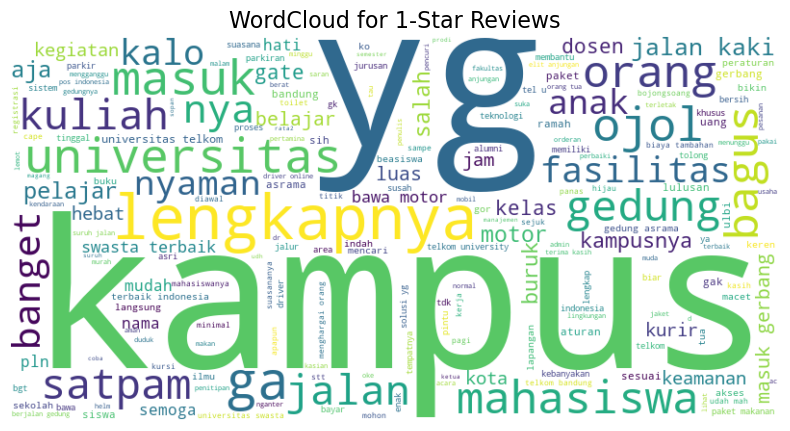

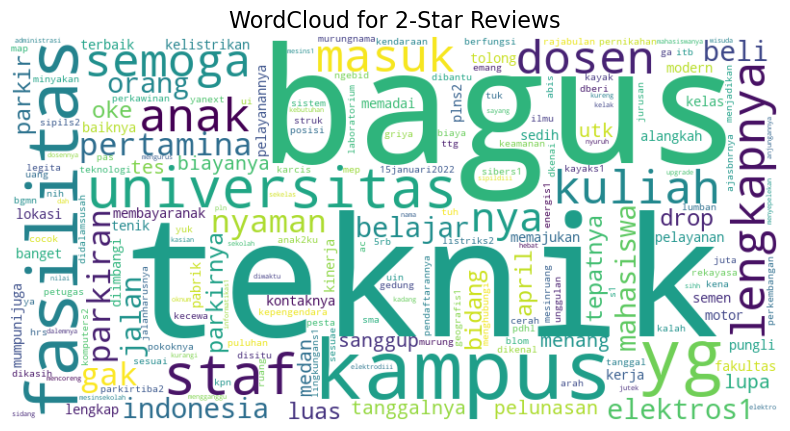

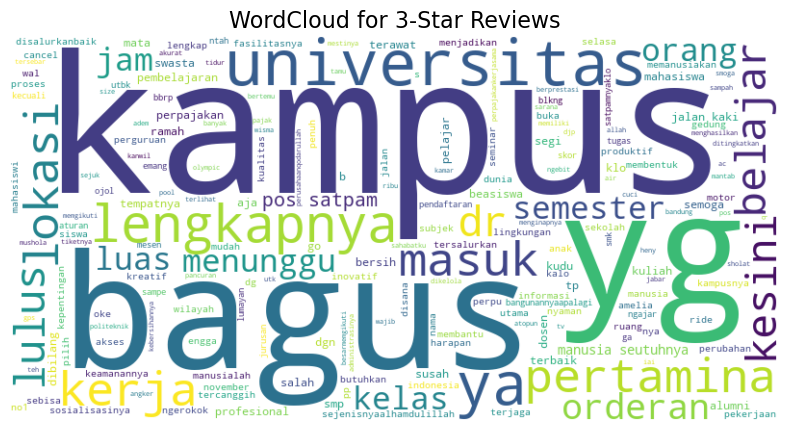

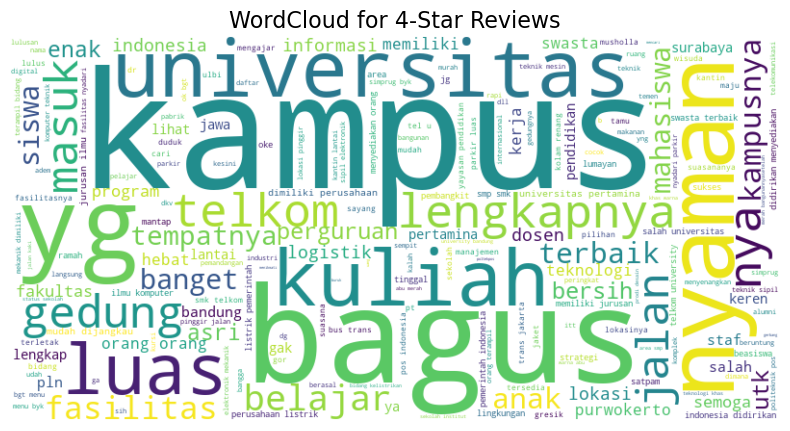

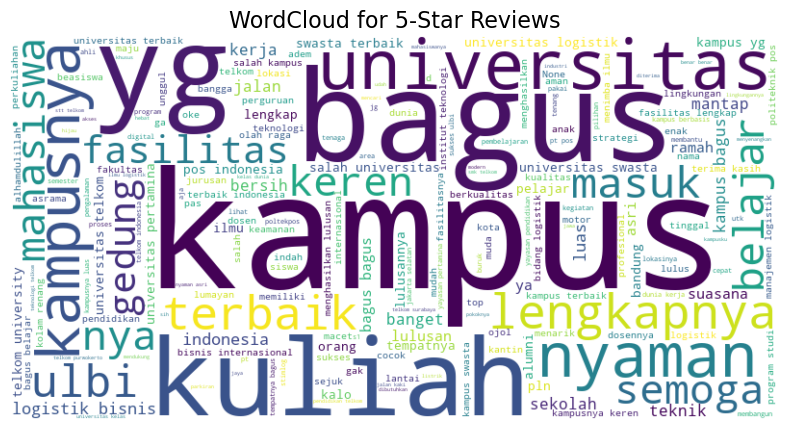

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all tokenized words into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['tokens'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [11]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['tokens'].progress_apply(apply_stemming)

print(df_total_all_new)

100%|██████████| 2495/2495 [04:02<00:00, 10.30it/s] 

                       nama  \
0            pemberi ulasan   
1     naufal adilla bestari   
2         aqila ashfa afiza   
3        nadiya nur altavia   
4             agus sulaeman   
...                     ...   
2490        arif sumaryanto   
2491        agung wicaksono   
2492          agung prabowo   
2493         adinda hashina   
2494             ridho juan   

                                                 review  bintang  word_count  \
0     kampus aneh pada masanya sebelum covid  waktu ...        1         194   
1     tidak memanusiakan siswa saat ospek contohnya ...        1          28   
2     harusnya bisa memporsikan berbagai acaradisini...        1          92   
3     saya bergabung di kampus ini selama 3 tahun ta...        1          33   
4     saya ortu dari salah satu siswa ulby yg mendap...        1         107   
...                                                 ...      ...         ...   
2490                          menuju universitas telkom        5   

In [12]:
df_total_all_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nama            2495 non-null   object
 1   review          2465 non-null   object
 2   bintang         2495 non-null   int64 
 3   word_count      2495 non-null   int64 
 4   tokens          2495 non-null   object
 5   stemmed_tokens  2495 non-null   object
dtypes: int64(2), object(4)
memory usage: 117.1+ KB


In [13]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)


Total Token Kosong: 356


356

In [14]:
# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['stemmed_tokens'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 0


0

In [15]:
# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens']:
    print(','.join(tokens))


kampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,udh,magang,suruh,ketua,prodinya,kasih,sodara,nyuruh,cari,magang,najis,bener,ketua,prodi,kampus,tau,sampe,ganti,nama,ulbi,bener,bobrok,moga,aja,dosen,sangka,baca,inget,dosa,orang,tua,sayaorang,tua,kota,bandung,usir,suruh,pulang,usia,orang,tua,tua,dosen,sopan,kagak,woisaya,nunggak,bayar,apa,uang,gedung,lunas,semester,lunas,sulit,najis,tralala,emang,inget,islam,percaya,mana,timbang,amal,buruk,bertahun2,jadi,nama,dosennyamembuat,orang,tua,kuliahin,anak,polman,dago,polban,dll,rata2,kuliah,sana,ga,sulit,kuliahnyani,kisah,nyata,pribadikampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,udh,magang,suruh,ketua,prodinya,kasih,sodara,nyuruh,cari,magang,najis,bener,ketua,prodi,kampus,lengkap
manusia,siswa,ospek,contoh,yg,sakit,suruh,istirahat,giat,pdhal,kampus,coba
porsi,acaradisini,kampus,letak,samping,dgn,masyarakat,yg,manajemen,gaa,pikir,dl,klo,ada,sewa,gedung,gor,utk,acaradengan,musik,yg,gema,keras,menggebu

In [34]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens'].progress_apply(apply_stemming)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens2']:
    print(','.join(tokens))


100%|██████████| 2495/2495 [03:21<00:00, 12.39it/s] 

kampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,udh,magang,suruh,ketua,prodinya,kasih,sodara,nyuruh,cari,magang,najis,bener,ketua,prodi,kampus,tau,sampe,ganti,nama,ulbi,bener,bobrok,moga,aja,dosen,sangka,baca,inget,dosa,orang,tua,sayaorang,tua,kota,bandung,usir,suruh,pulang,usia,orang,tua,tua,dosen,sopan,kagak,woisaya,nunggak,bayar,apa,uang,gedung,lunas,semester,lunas,sulit,najis,tralala,emang,inget,islam,percaya,mana,timbang,amal,buruk,bertahun2,jadi,nama,dosennyamembuat,orang,tua,kuliahin,anak,polman,dago,polban,dll,rata2,kuliah,sana,ga,sulit,kuliahnyani,kisah,nyata,pribadikampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,udh,magang,suruh,ketua,prodinya,kasih,sodara,nyuruh,cari,magang,najis,bener,ketua,prodi,kampus,lengkap
manusia,siswa,ospek,contoh,yg,sakit,suruh,istirahat,giat,pdhal,kampus,coba
porsi,acaradisini,kampus,letak,samping,dgn,masyarakat,yg,manajemen,gaa,pikir,dl,klo,ada,sewa,gedung,gor,utk,acaradengan,musik,yg,gema,keras,menggebu

In [42]:
import pandas as pd
import re


# Fungsi untuk menghapus angka
def remove_numbers(token_list):
    return [token for token in token_list if not re.search(r'\d', token)]  # Hapus token yang mengandung angka

# Terapkan fungsi ke setiap baris
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens2'].apply(remove_numbers)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens2']:
    print(','.join(tokens))


kampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,udh,magang,suruh,ketua,prodinya,kasih,sodara,nyuruh,cari,magang,najis,bener,ketua,prodi,kampus,tau,sampe,ganti,nama,ulbi,bener,bobrok,moga,aja,dosen,sangka,baca,inget,dosa,orang,tua,sayaorang,tua,kota,bandung,usir,suruh,pulang,usia,orang,tua,tua,dosen,sopan,kagak,woisaya,nunggak,bayar,apa,uang,gedung,lunas,semester,lunas,sulit,najis,tralala,emang,inget,islam,percaya,mana,timbang,amal,buruk,jadi,nama,dosennyamembuat,orang,tua,kuliahin,anak,polman,dago,polban,dll,kuliah,sana,ga,sulit,kuliahnyani,kisah,nyata,pribadikampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,udh,magang,suruh,ketua,prodinya,kasih,sodara,nyuruh,cari,magang,najis,bener,ketua,prodi,kampus,lengkap
manusia,siswa,ospek,contoh,yg,sakit,suruh,istirahat,giat,pdhal,kampus,coba
porsi,acaradisini,kampus,letak,samping,dgn,masyarakat,yg,manajemen,gaa,pikir,dl,klo,ada,sewa,gedung,gor,utk,acaradengan,musik,yg,gema,keras,menggebur,bikin,telinga,

In [9]:
import pandas as pd
import ast

# List nama dataset yang ingin digunakan
dataset_names = [
    "ITP_Cleaned.xlsx",
    "ITTP_Cleaned.xlsx",
    "ITTS_Cleaned.xlsx",
    "ULBI_CLeaned.xlsx",
    "UISI_Cleaned.xlsx",
    "UPER_Cleaned.xlsx",
    "TELU_Cleaned.xlsx"
]

# Cara 1: Gunakan double backslash
folder_path = "C:\\Users\\HAFIZ\\Downloads\\Untitled Folder\\"
# List untuk menyimpan DataFrame sementara
df_list = []

# Loop untuk membaca dataset yang dipilih
for dataset in dataset_names:
    file_path = folder_path + dataset  # Gabungkan folder path dengan nama file
    df = pd.read_excel(file_path)  # Baca file Excel
    df['stemmed_tokens2'] = df['stemmed_tokens2'].apply(ast.literal_eval)  # Konversi string ke list
    df_list.append(df)  # Tambahkan ke list

# Gabungkan semua DataFrame menjadi satu
df_total_all_new = pd.concat(df_list, ignore_index=True)

# Cek hasil
print(df_total_all_new.head())
print(len(df_total_all_new))  # Cek jumlah baris total


                               nama  bintang  word_count  \
0                     nindyo yuwono        4          46   
1         muhammad fanani hafifudin        4         194   
2             hafizh hilman asyhari        2          21   
3  the scrivener's presenter global        2          49   
4                    muhammad rizky        5          96   

                                     stemmed_tokens2  
0  [kampus, mahasiswa, teknik, timba, ilmu, fakul...  
1  [kampus, bagus, fasilitas, pada, alangkah, bai...  
2  [cocok, abis, sma, ajar, teknik, listrik, faku...  
3  [ruang, kelas, bagus, fasilitas, yg, mumpuni, ...  
4  [kampus, sayang, mudah, jangkau, karna, tol, j...  
2495


In [17]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/nadyndyaa/Kamus-Alay/refs/heads/main/Kamus%20Alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['Alay'], kamus_alay['Baik']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens2'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))



100%|██████████| 2495/2495 [00:00<00:00, 312428.38it/s]

kampus,mahasiswa,teknik,timba,ilmu,fakultas,teknik,jurus,elektro,aja,ya,fokus,utama,dukung,usaha,listrik,pln,motto,bidang,energi,listrik,pilar,it,pln,darmawan,prasojo,dirut,pln
kampus,bagus,fasilitas,pada,alangkah,baik,maju,fasilitas,imbang,kerja,staf,dosen,mahasiswa,staf,layan,baik,staf,fakultas,jutek,kadang,sepele,butuh,mahasiswa,ganggu,waktu,urus,administrasi,sidang,wisuda,tolong,upgrade,layan,kasi,kampus,dah,bagus,bagus,layan,reng,kurang,pungli,pungli,kampus,sih,sayang,banget,kelas,kampus,it,pln,dalem,nyuruh,beli,nilai,bagus,anjung,dosen,bagus,oknum,coreng,nama,bagus,dosen,tidak,masuk,masuk,uas,nyruh,beli,buku,tidak,beli,gk,dpt,nili,bagus,moga,apresiasi,kritik,bahan,timbang,staf,dosen,kampus,meningkat,untuk,kampus,bagus,fasilitas,pada,alangkah,baik,maju,fasilitas,imbang,kerja,staf,dosen,mahasiswa,staf,layan,lengkap
cocok,abis,sma,ajar,teknik,listrik,fakultas,tuh,ya,laboratorium,yg,modern,sesuai,kembang,teknologi,modern
ruang,kelas,bagus,fasilitas,yg,mumpuni,juga,jurus,lengkap,tekni

In [18]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/Aiji3107/kamus_alay/refs/heads/main/kamus_alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['slang'], kamus_alay['formal']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 2495/2495 [00:00<00:00, 271629.25it/s]

kampus,mahasiswa,teknik,timba,ilmu,fakultas,teknik,jurus,elektro,saja,ya,fokus,utama,dukung,usaha,listrik,pln,motto,bidang,energi,listrik,pilar,itu,pln,darmawan,prasojo,dirut,pln
kampus,bagus,fasilitas,pada,alangkah,baik,maju,fasilitas,imbang,kerja,staf,dosen,mahasiswa,staf,layan,baik,staf,fakultas,jutek,kadang,sepele,butuh,mahasiswa,ganggu,waktu,urus,administrasi,sidang,wisuda,tolong,upgrade,layan,kasih,kampus,deh,bagus,bagus,layan,reng,kurang,pungli,pungli,kampus,sih,sayang,banget,kelas,kampus,itu,pln,dalem,nyuruh,beli,nilai,bagus,anjung,dosen,bagus,oknum,coreng,nama,bagus,dosen,tidak,masuk,masuk,uas,nyruh,beli,buku,tidak,beli,enggak,dapat,nili,bagus,moga,apresiasi,kritik,bahan,timbang,staf,dosen,kampus,meningkat,untuk,kampus,bagus,fasilitas,pada,alangkah,baik,maju,fasilitas,imbang,kerja,staf,dosen,mahasiswa,staf,layan,lengkap
cocok,habis,sama,ajar,teknik,listrik,fakultas,tuh,ya,laboratorium,yang,modern,sesuai,kembang,teknologi,modern
ruang,kelas,bagus,fasilitas,yang,mumpuni,juga,jur

In [19]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(remove_stopwords)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(apply_stemming)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 2495/2495 [00:00<00:00, 354714.54it/s]


kampus,mahasiswa,teknik,timba,ilmu,fakultas,teknik,jurus,elektro,ya,fokus,utama,dukung,usaha,listrik,pln,motto,bidang,energi,listrik,pilar,pln,darmawan,prasojo,dirut,pln
kampus,bagus,fasilitas,alangkah,maju,fasilitas,imbang,kerja,staf,dosen,mahasiswa,staf,layan,staf,fakultas,jutek,kadang,sepele,butuh,mahasiswa,ganggu,urus,administrasi,sidang,wisuda,tolong,upgrade,layan,kasih,kampus,deh,bagus,bagus,layan,reng,pungli,pungli,kampus,sih,sayang,banget,kelas,kampus,pln,dalem,nyuruh,beli,nilai,bagus,anjung,dosen,bagus,oknum,coreng,nama,bagus,dosen,masuk,masuk,uas,nyruh,beli,buku,beli,nili,bagus,moga,apresiasi,kritik,bahan,timbang,staf,dosen,kampus,meningkat,kampus,bagus,fasilitas,alangkah,maju,fasilitas,imbang,kerja,staf,dosen,mahasiswa,staf,layan,lengkap
cocok,habis,ajar,teknik,listrik,fakultas,tuh,ya,laboratorium,modern,sesuai,kembang,teknologi,modern
ruang,kelas,bagus,fasilitas,mumpuni,jurus,lengkap,teknik,teknik,sistem,rekayasa,aman,kendara,teknik,ilmu,teknik,mesin,ruang,kelas,bagus,fasil

100%|██████████| 2495/2495 [01:55<00:00, 21.53it/s] 

kampus,mahasiswa,teknik,timba,ilmu,fakultas,teknik,jurus,elektro,ya,fokus,utama,dukung,usaha,listrik,pln,motto,bidang,energi,listrik,pilar,pln,darmawan,prasojo,dirut,pln
kampus,bagus,fasilitas,alangkah,maju,fasilitas,imbang,kerja,staf,dosen,mahasiswa,staf,layan,staf,fakultas,jutek,kadang,sepele,butuh,mahasiswa,ganggu,urus,administrasi,sidang,wisuda,tolong,upgrade,layan,kasih,kampus,deh,bagus,bagus,layan,reng,pungli,pungli,kampus,sih,sayang,banget,kelas,kampus,pln,dalem,nyuruh,beli,nilai,bagus,anjung,dosen,bagus,oknum,coreng,nama,bagus,dosen,masuk,masuk,uas,nyruh,beli,buku,beli,nili,bagus,moga,apresiasi,kritik,bahan,timbang,staf,dosen,kampus,tingkat,kampus,bagus,fasilitas,alangkah,maju,fasilitas,imbang,kerja,staf,dosen,mahasiswa,staf,layan,lengkap
cocok,habis,ajar,teknik,listrik,fakultas,tuh,ya,laboratorium,modern,sesuai,kembang,teknologi,modern
ruang,kelas,bagus,fasilitas,mumpuni,jurus,lengkap,teknik,teknik,sistem,rekayasa,aman,kendara,teknik,ilmu,teknik,mesin,ruang,kelas,bagus,fasilit

In [20]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)


# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 153
Total Token Kosong: 0


0

In [21]:
import ast
import pandas as pd

# Kata-kata yang ingin dihapus
stopwords = {'none','oktavian','instagramable', 'nya', 'moga','ken','pus','imsi', 'oke', 'ya', 'isi', 'ok', 'jos', 'gaes', 'via','nih','pubg','a','b','uis','kes','eks','amelia'}

# Fungsi untuk menghitung jumlah token kosong atau yang termasuk stopwords
def count_empty_tokens(df):
    empty_tokens = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip() or token.lower() in stopwords))
    total_empty_tokens = empty_tokens.sum()
    print(f"Total empty or stopword tokens: {total_empty_tokens}")

# Pastikan kolom 'stemmed_tokens4' berisi list, bukan string yang terlihat seperti list
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Bersihkan token kosong dan kata-kata yang ada dalam stopwords
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip() and token.lower() not in stopwords]
)

# Konfirmasi bahwa token yang tidak diinginkan sudah dihapus
count_empty_tokens(df_total_all_new)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


Total empty or stopword tokens: 0
kampus,mahasiswa,teknik,timba,ilmu,fakultas,teknik,jurus,elektro,fokus,utama,dukung,usaha,listrik,pln,motto,bidang,energi,listrik,pilar,pln,darmawan,prasojo,dirut,pln
kampus,bagus,fasilitas,alangkah,maju,fasilitas,imbang,kerja,staf,dosen,mahasiswa,staf,layan,staf,fakultas,jutek,kadang,sepele,butuh,mahasiswa,ganggu,urus,administrasi,sidang,wisuda,tolong,upgrade,layan,kasih,kampus,deh,bagus,bagus,layan,reng,pungli,pungli,kampus,sih,sayang,banget,kelas,kampus,pln,dalem,nyuruh,beli,nilai,bagus,anjung,dosen,bagus,oknum,coreng,nama,bagus,dosen,masuk,masuk,uas,nyruh,beli,buku,beli,nili,bagus,apresiasi,kritik,bahan,timbang,staf,dosen,kampus,tingkat,kampus,bagus,fasilitas,alangkah,maju,fasilitas,imbang,kerja,staf,dosen,mahasiswa,staf,layan,lengkap
cocok,habis,ajar,teknik,listrik,fakultas,tuh,laboratorium,modern,sesuai,kembang,teknologi,modern
ruang,kelas,bagus,fasilitas,mumpuni,jurus,lengkap,teknik,teknik,sistem,rekayasa,aman,kendara,teknik,ilmu,teknik,mesin,ru

In [22]:
import gensim
from gensim import corpora

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'])
# Buang token kosong jika ada yang tersisa
dictionary.filter_extremes(no_below=1)  # Menghapus kata yang muncul kurang dari 1 dokumen
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.040*"kampus" + 0.023*"aman" + 0.020*"nyaman" + 0.020*"ajar" + 0.018*"ramah" + 0.015*"parkir" + 0.014*"buruk" + 0.013*"mantap" + 0.012*"kerja" + 0.010*"asrama"
Topic: 1 
Words: 0.062*"universitas" + 0.050*"bagus" + 0.028*"telkom" + 0.026*"kampus" + 0.021*"indonesia" + 0.018*"salah" + 0.017*"swasta" + 0.016*"ajar" + 0.014*"lengkap" + 0.014*"fasilitas"
Topic: 2 
Words: 0.060*"kampus" + 0.023*"universitas" + 0.018*"mahasiswa" + 0.017*"ajar" + 0.014*"fakultas" + 0.014*"logistik" + 0.014*"lulus" + 0.013*"jalan" + 0.012*"bisnis" + 0.011*"ilmu"
Topic: 3 
Words: 0.023*"jalan" + 0.020*"makan" + 0.019*"asrama" + 0.017*"sedia" + 0.016*"ojol" + 0.015*"atur" + 0.014*"driver" + 0.014*"paket" + 0.013*"kampus" + 0.012*"bawa"
Topic: 4 
Words: 0.044*"kampus" + 0.027*"jalan" + 0.017*"bagus" + 0.016*"telkom" + 0.016*"masuk" + 0.015*"luas" + 0.014*"lengkap" + 0.013*"satpam" + 0.013*"banget" + 0.012*"gedung"


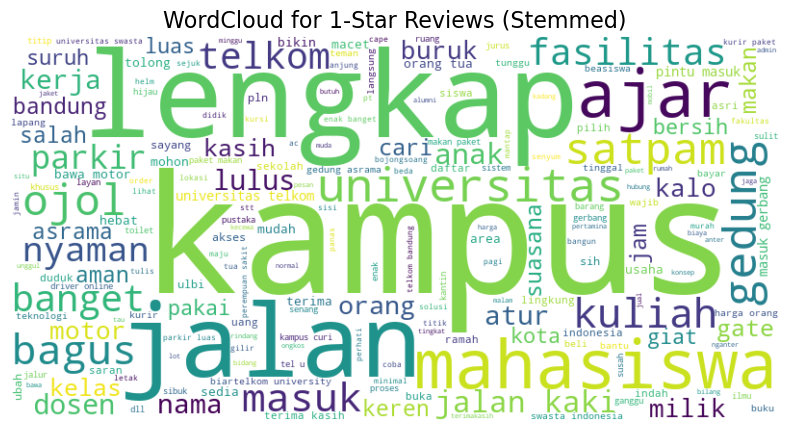

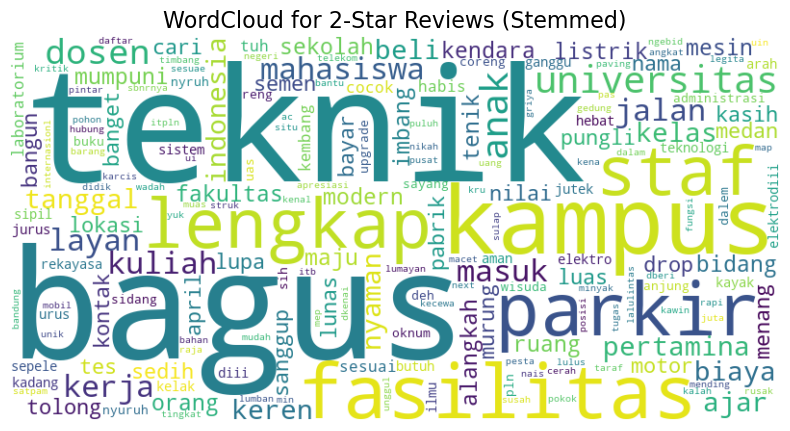

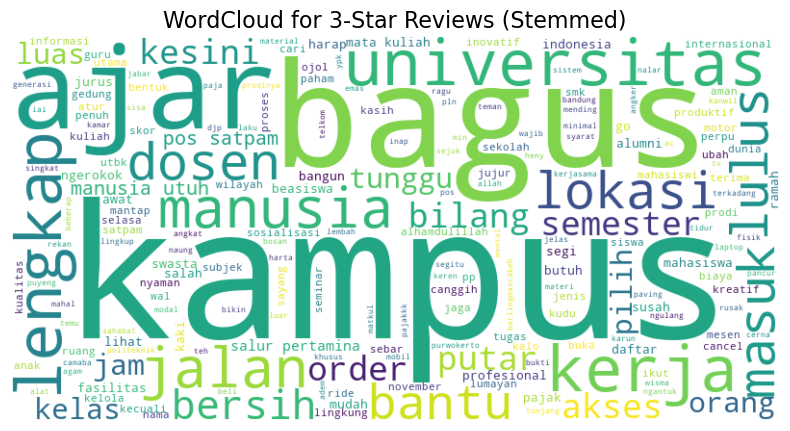

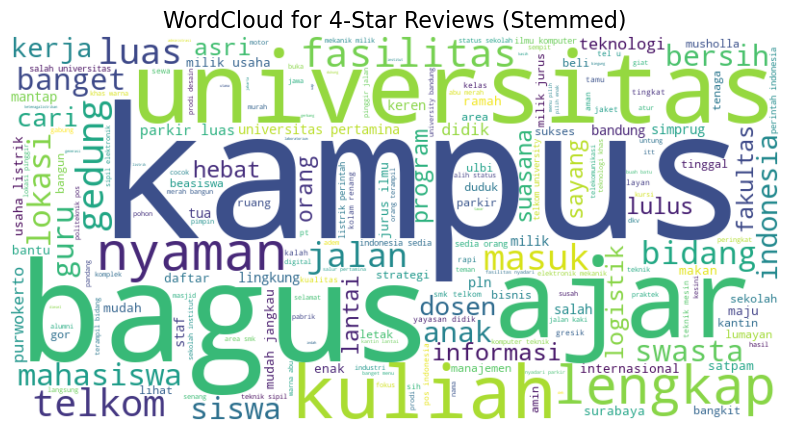

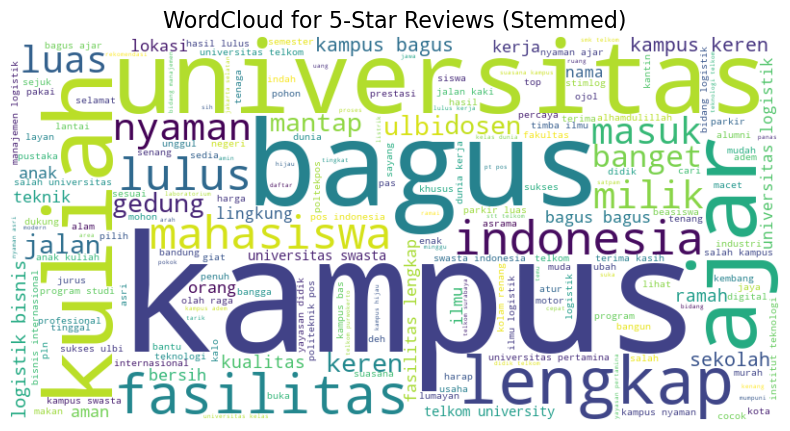

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all stemmed tokens into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['stemmed_tokens4'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews (Stemmed)', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [24]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from tqdm import tqdm
import pandas as pd

def compute_coherence_values(dictionary, corpus, texts, topic_range, passes_range):
    results = []
    best_coherence = 0
    best_model = None
    best_params = {}
    
    for num_topics in tqdm(topic_range, desc="Computing coherence for topics"):
        for passes in tqdm(passes_range, desc=f"Testing {num_topics} topics", leave=False):
            # Membuat model LDA dengan jumlah topik dan passes yang berbeda
            lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes, random_state=100)
            
            # Menghitung nilai koherensi
            coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_score = coherence_model.get_coherence()
            
            # Simpan hasil
            results.append({'num_topics': num_topics, 'passes': passes, 'coherence': coherence_score})
            
            # Cek apakah nilai koherensi saat ini adalah yang terbaik
            if coherence_score > best_coherence:
                best_coherence = coherence_score
                best_model = lda_model
                best_params = {'num_topics': num_topics, 'passes': passes}
    
    # Konversi hasil ke DataFrame untuk analisis lebih lanjut
    results_df = pd.DataFrame(results)
    
    print(f"\n✅ Nilai koherensi optimal: {best_coherence:.4f}")
    print(f"📊 Parameter terbaik: {best_params}")

    return results_df, best_model, best_params

# 🔥 Jalankan fungsi dengan rentang topik dan passes yang diinginkan
topic_range = range(1, 11)  # Dari 1 hingga 10 topik
passes_range = range(15, 91, 15)  # Dari 15 hingga 90 dengan kelipatan 15

results_df, best_lda_model, best_params = compute_coherence_values(dictionary=dictionary, 
                                                                   corpus=corpus, 
                                                                   texts=df_total_all_new['stemmed_tokens4'], 
                                                                   topic_range=topic_range, 
                                                                   passes_range=passes_range)


Computing coherence for topics: 100%|██████████| 10/10 [45:10<00:00, 271.03s/it]


✅ Nilai koherensi optimal: 0.5556
📊 Parameter terbaik: {'num_topics': 3, 'passes': 15}


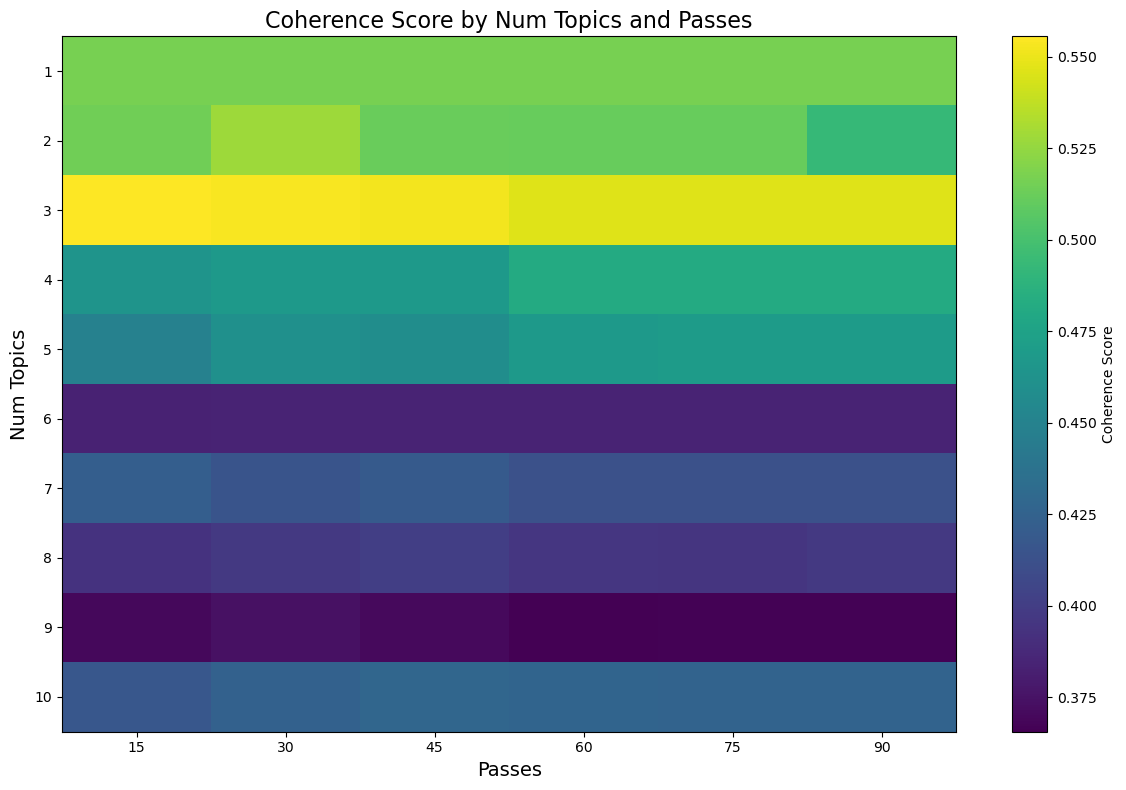

In [25]:
import matplotlib.pyplot as plt

# Visualisasi nilai koherensi dengan sumbu x dan y yang sesuai
pivot_table = results_df.pivot(index='num_topics', columns='passes', values='coherence')

# Membuat heatmap dengan label yang sesuai
plt.figure(figsize=(12, 8))
plt.title("Coherence Score by Num Topics and Passes", fontsize=16)
plt.xlabel("Passes", fontsize=14)
plt.ylabel("Num Topics", fontsize=14)

# Menentukan label sumbu x dan y dengan nilai yang sesuai
plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index)

# Menampilkan heatmap
plt.imshow(pivot_table, cmap='viridis', aspect='auto')
plt.colorbar(label='Coherence Score')
plt.tight_layout()
plt.show()


In [29]:
# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

100%|██████████| 2495/2495 [00:00<00:00, 833582.00it/s]


Topic: 0 
Words: 0.042*"bagus" + 0.040*"kampus" + 0.022*"ajar" + 0.022*"fasilitas" + 0.021*"universitas" + 0.016*"nyaman" + 0.015*"lengkap" + 0.015*"kuliah" + 0.014*"luas" + 0.012*"gedung"
Topic: 1 
Words: 0.043*"kampus" + 0.021*"jalan" + 0.012*"gedung" + 0.012*"masuk" + 0.011*"aman" + 0.010*"parkir" + 0.010*"lengkap" + 0.010*"ojol" + 0.010*"makan" + 0.010*"mahasiswa"
Topic: 2 
Words: 0.040*"universitas" + 0.028*"kampus" + 0.024*"indonesia" + 0.023*"telkom" + 0.017*"swasta" + 0.016*"salah" + 0.011*"orang" + 0.010*"kerja" + 0.010*"lengkap" + 0.009*"kuliah"


In [35]:
import os
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel

# Pastikan semua elemen dalam kolom 'stemmed_tokens4' adalah list
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(lambda x: x if isinstance(x, list) else [])

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Mengambil topik-topik dan menyimpannya dalam format yang dapat diekspor
topics = []
for idx, topic in lda_model.print_topics(-1):
    words = topic.split(' + ')
    topic_dict = {'Topic': idx}
    for i, word in enumerate(words):
        weight, term = word.split('*"')
        term = term.replace('"', '')
        topic_dict[f'Word_{i+1}'] = f'{term} ({weight})'
    topics.append(topic_dict)

# Konversi ke DataFrame
df_topics = pd.DataFrame(topics)

# Simpan ke file Excel dengan sheet baru
file_path = 'Seluruh_Univ_lda_topics2.xlsx'
sheet_name = 'Seluruh_Univ_lda_topics'  # Nama sheet baru yang diinginkan

# Cek apakah file sudah ada
file_exists = os.path.exists(file_path)

if file_exists:
    # Jika file sudah ada, gunakan mode append dengan if_sheet_exists="replace"
    with pd.ExcelWriter(file_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
        df_topics.to_excel(writer, sheet_name=sheet_name, index=False)
else:
    # Jika file belum ada, buat file baru tanpa if_sheet_exists
    with pd.ExcelWriter(file_path, mode="w", engine="openpyxl") as writer:
        df_topics.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Topik telah disimpan dalam sheet '{sheet_name}' pada file '{file_path}'")


Topik telah disimpan dalam sheet 'Seluruh_Univ_lda_topics' pada file 'Seluruh_Univ_lda_topics2.xlsx'
